In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from IPython.display import display
from PIL import Image

import os
# check for set environment variable JB_NOSHOW
show = True
if 'JB_NOSHOW' in os.environ:
    show = False

# Data Analysis I

In this example we take a closer look at the `CHID_devc.csv` file and how to sort the different data series. For this we build on [Basic Example II](../01_basic/02_basic_example_ii) for the simulation setup and [Basic Example III](../01_basic/03_basic_example_iii) for reading the data.

Our goal in this example is to plot some temperatures recorded inside the doorway. We want to use the device `ID`s to sort the data sets.

Note: The individual file paths are likely different on your system, depending on your file structure.

## Read the Device Data

At first we read the device (`DEVC`) data that is stored in `CHID_devc.csv` file. The principle structure is the same as the `CHID_hrr.csv` file discussed in Basic Example III. The first line contains the units, the second the column header and from the third onwards the data is provided. The column headers are corresponding to the device `ID`s. When setting up a simulation, consider providing useful `ID`s since they come in handy when processing the results.

According to the experiment report, there were three thermocouple trees used inside the compartment: one in the corner to the left of the door, one to the right and one in the centre of the doorway. Here the temperature `QUANTITY` is used.

As in the other example, we read the data as Pandas DataFrame:

In [2]:
# Set path to file.
devc_path = os.path.join("..", "01_basic", "data", 
                         "StecklerExample_devc.csv")
# Read CSV file as Pandas DataFrame.
devc_df = pd.read_csv(devc_path, header=1)

# Check result.
devc_df.head()

,Time,Temp_Door_Vertical_Centre-1,Temp_Door_Vertical_Centre-2,Temp_Door_Vertical_Centre-3,Temp_Door_Vertical_Centre-4,Temp_Door_Vertical_Centre-5,Temp_Door_Vertical_Centre-6,Temp_Door_Vertical_Centre-7,Temp_Door_Vertical_Centre-8,Temp_Door_Vertical_Centre-9,...,Temp_Corner_Vertical_Right-13,Temp_Corner_Vertical_Right-14,Temp_Corner_Vertical_Right-15,Temp_Corner_Vertical_Right-16,Temp_Corner_Vertical_Right-17,Temp_Corner_Vertical_Right-18,Temp_Corner_Vertical_Right-19,Temp_Corner_Vertical_Right-20,Temp_Corner_Vertical_Right-21,Temp_Corner_Vertical_Right-22
0,0.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,...,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
1,10.160553,20.000065,20.000050,20.000040,20.000053,20.000048,20.000049,20.000045,20.000020,20.000003,...,20.000002,20.000012,20.000029,20.000014,19.999995,19.999995,20.000026,20.000010,19.999987,19.999987
2,20.053195,20.042489,20.037320,20.037358,20.038993,20.043594,20.044521,20.041464,20.037965,20.035092,...,20.015047,20.014676,20.014856,20.014610,20.014094,20.013343,20.012866,20.012430,20.012105,20.023764
3,30.138771,20.133532,20.106942,20.111755,20.116135,20.124978,20.126660,20.122295,20.115279,20.107121,...,20.055775,20.053910,20.053169,20.051178,20.049088,20.073597,21.219877,25.086598,29.965930,32.676133
4,40.014110,20.249983,20.187106,20.198082,20.205694,20.218419,20.221221,20.214411,20.203569,20.232863,...,29.603308,33.315057,37.394429,41.777415,46.148990,51.011767,55.731551,58.638679,60.386028,61.692411


## Choose a Subset of the Data

When we designed the simulation setup, we defined three temperature recording trees. The `ID`s chosen for them are:  "Temp_Corner_Vertical_Left", "Temp_Door_Vertical_Centre" and "Temp_Corner_Vertical_Right". This information can now be used to focus on the desired data sets. 

Using `list(DataFrame)` a list is created that contains all the headers. Each element in this list, i.e. each header, is a string. With some basic processing of these strings, a new list can be built that only contains the headers of interest. For this an empty list is created, which will contain the door-related headers. With a `for` loop we take a look at each header. If the header contains the sub-string "Door", it is copied to the new list.

In [3]:
# Initialise result collection.
door_headers = list()

# Get list of DataFrame headers.
headers = list(devc_df)

# Go over all headers.
for header in headers:
    # Check if the DEVC is in the doorway.
    if "Door" in header:
        # Collect header.
        door_headers.append(header)
        
        
# Check result.
door_headers

['Temp_Door_Vertical_Centre-1',
 'Temp_Door_Vertical_Centre-2',
 'Temp_Door_Vertical_Centre-3',
 'Temp_Door_Vertical_Centre-4',
 'Temp_Door_Vertical_Centre-5',
 'Temp_Door_Vertical_Centre-6',
 'Temp_Door_Vertical_Centre-7',
 'Temp_Door_Vertical_Centre-8',
 'Temp_Door_Vertical_Centre-9',
 'Temp_Door_Vertical_Centre-10',
 'Temp_Door_Vertical_Centre-11',
 'Temp_Door_Vertical_Centre-12',
 'Temp_Door_Vertical_Centre-13',
 'Temp_Door_Vertical_Centre-14',
 'Temp_Door_Vertical_Centre-15',
 'Temp_Door_Vertical_Centre-16',
 'Temp_Door_Vertical_Centre-17',
 'Temp_Door_Vertical_Centre-18']

## Plot the Doorway Data

With the newly created list, some of the temperatures inside the doorway can be plotted. It could be helpful to provide the header in a variable separatly, here `devc_id`. 

For one it can then easily be used to address the column as well as serve as label for the data series. 

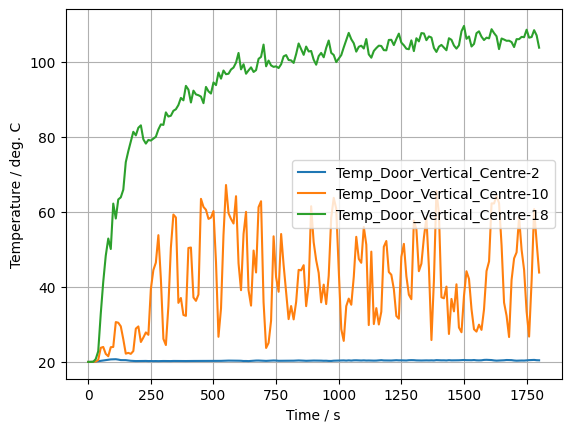

In [4]:
# Plot sim response.
devc_id = door_headers[1]

devc_data = devc_df[devc_id]
plt.plot(devc_df["Time"], 
         devc_data,
         label=devc_id)

# Plot sim response.
devc_id = door_headers[9]

devc_data = devc_df[devc_id]
plt.plot(devc_df["Time"], 
         devc_data,
         label=devc_id)

# Plot sim response.
devc_id = door_headers[17]

devc_data = devc_df[devc_id]
plt.plot(devc_df["Time"], 
         devc_data,
         label=devc_id)


# Plot meta data.
plt.xlabel("Time / s")
plt.ylabel("Temperature / deg. C")
plt.legend()
plt.grid()

Furthermore, one can easily set up a loop to plot all data series, like:

```
# devc_id = door_headers[1]
for devc_id in door_headers:
    
    devc_data = devc_df[devc_id]
    plt.plot(devc_df["Time"], 
             devc_data,
             label=devc_id)
```

This will lead to a messy plot here, due to the large amount of data. It might be a good idea to set up some condition to reduce the amount of plotted date series. For example using list comprehension, every n-th element of a list can be chosen: `[0::n]`. It can start at the m-th position `[m::n]`. For $m = 0$ one does not need to provide a value.


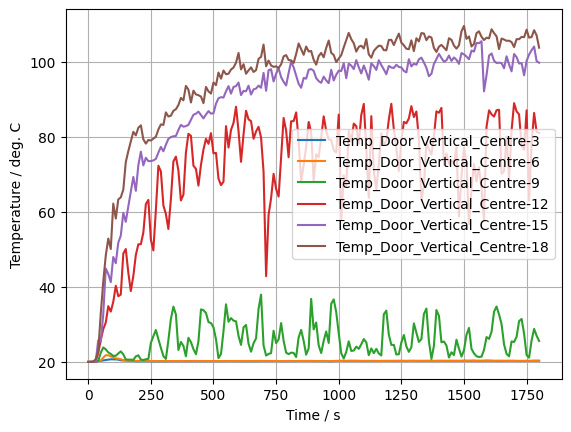

In [5]:
# Plot sim response.

# devc_id = door_headers[1]

# Plot every third data series, starting from the third.
for devc_id in door_headers[2::3]:
    
    devc_data = devc_df[devc_id]
    plt.plot(devc_df["Time"], 
             devc_data,
             label=devc_id)


# Plot meta data.
plt.xlabel("Time / s")
plt.ylabel("Temperature / deg. C")
plt.legend()
plt.grid()

## File

```{literalinclude} ../01_basic/data/BasicExample2.fds
```